In [4]:
import torch
import numpy as np
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.debugger import set_trace
from importlib import reload
from tkmodel.TwoCUM_copy import TwoCUMfittingConc
from tkmodel.TwoCUM_copy import TwoCUM
import tkmodel

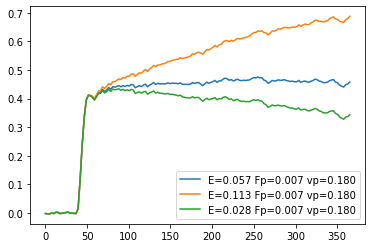

In [10]:
def plot_params(y):
        AIF = np.load("data/AIF.npy")
        t = np.arange(0,366,2.45)

        fitted_curve = TwoCUM(params, t, AIF, 0)
        textstr = 'E={:.3f} Fp={:.3f} vp={:.3f}'.format(y[0], y[1],  y[2])
        plt.plot(t, fitted_curve, label = textstr)
        
def show_changes(params):


reload(tkmodel.TwoCUM)
series = np.load("data/Example_Conc.npy")
AIF = np.load("data/AIF.npy")
t = np.arange(0,366,2.45)


fitted_data = TwoCUMfittingConc(t, AIF, series[80,100,14,:] , 0)

params = fitted_data[:3]
plot_params(params)

params[0] = params[0]/2
plot_params(params)

params[0] = params[0]*4
plot_params(params)

plt.legend()
plt.show()




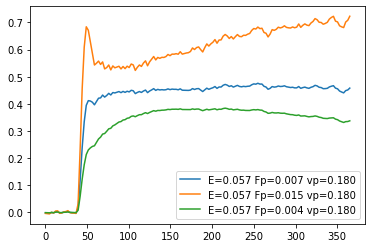

In [12]:
fitted_data = TwoCUMfittingConc(t, AIF, series[80,100,14,:] , 0)

params = fitted_data[:3]
plot_params(params)

params[1] = params[1]/2
plot_params(params)

params[1] = params[1]*4
plot_params(params)

plt.legend()
plt.show()

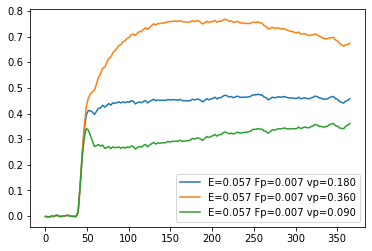

In [13]:
fitted_data = TwoCUMfittingConc(t, AIF, series[80,100,14,:] , 0)

params = fitted_data[:3]
plot_params(params)

params[2] = params[2]/2
plot_params(params)

params[2] = params[2]*4
plot_params(params)

plt.legend()
plt.show()

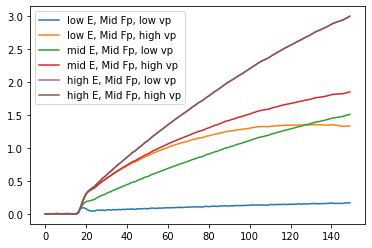

In [6]:
fitted_data2 = np.array([0.05, 0.005, 0.000001, 1.46870388e-01, 0.00000000e+00, 0.00000000e+00])
fitted_curve2 = TwoCUM(fitted_data2[0:3], t, AIF, 0)
plt.plot(fitted_curve2, label='low E, Mid Fp, low vp')

fitted_data3 = np.array([0.05, 0.005, 0.99, 1.46870388e-01, 0.00000000e+00, 0.00000000e+00])
fitted_curve = TwoCUM(fitted_data3[0:3], t, AIF, 0)
plt.plot(fitted_curve, label='low E, Mid Fp, high vp')

fitted_data2 = np.array([0.5, 0.005, 0.000001, 1.46870388e-01, 0.00000000e+00, 0.00000000e+00])
fitted_curve2 = TwoCUM(fitted_data2[0:3], t, AIF, 0)
plt.plot(fitted_curve2, label='mid E, Mid Fp, low vp')

fitted_data3 = np.array([0.5, 0.005, 0.99, 1.46870388e-01, 0.00000000e+00, 0.00000000e+00])
fitted_curve = TwoCUM(fitted_data3[0:3], t, AIF, 0)
plt.plot(fitted_curve, label='mid E, Mid Fp, high vp')


fitted_data2 = np.array([0.999, 0.005, 0.000001, 1.46870388e-01, 0.00000000e+00, 0.00000000e+00])
fitted_curve2 = TwoCUM(fitted_data2[0:3], t, AIF, 0)
plt.plot(fitted_curve2, label='high E, Mid Fp, low vp')

fitted_data3 = np.array([0.999, 0.005, 0.99, 1.46870388e-01, 0.00000000e+00, 0.00000000e+00])
fitted_curve = TwoCUM(fitted_data3[0:3], t, AIF, 0)
plt.plot(fitted_curve, label='high E, Mid Fp, high vp')

#

plt.legend()

/var/folders/2m/v5d7mznx1v39h5mv6nwjnvxm0000gn/T/ipykernel_88579/1352080183.py:23: RuntimeWarning: divide by zero encountered in true_divide
  exptTp_1 = np.exp(-1*1/Tp)
/var/folders/2m/v5d7mznx1v39h5mv6nwjnvxm0000gn/T/ipykernel_88579/1352080183.py:24: RuntimeWarning: divide by zero encountered in true_divide
  exptTp_100 = np.exp(-1*100/Tp)


Text(0.5, 0, 'vp')

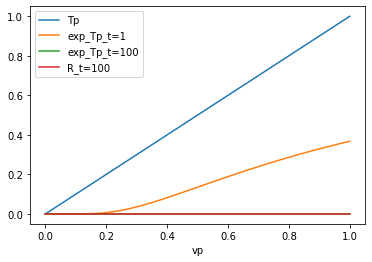

In [7]:
params = [0.999, 2, 1]
E, Fp, vp = params
# E between 0 and 1
# FP blood flow
# vp between 0 and 1

#First calculate the parameter Tp
Tp=(vp/Fp)*(1-E)

#Calculate the IRF
exptTp=np.exp(-1*t/Tp)

R=exptTp*(1-E) + E

R, exptTp, Tp



vp = np.linspace(0,1,num=1000)

Fp, E = 0.99999999987e+00, 1.00000000e-05
Tp=(vp/Fp)*(1-E)
exptTp_1 = np.exp(-1*1/Tp)
exptTp_100 = np.exp(-1*100/Tp)
R=exptTp_100*(1-E) + E

plt.plot(vp, Tp, label= 'Tp')
plt.plot(vp, exptTp_1, label= 'exp_Tp_t=1')
plt.plot(vp, exptTp_100, label= 'exp_Tp_t=100')
plt.plot(vp, R, label= 'R_t=100')
plt.legend()
plt.xlabel('vp')




In [8]:
series.shape

(192, 192, 30, 150)

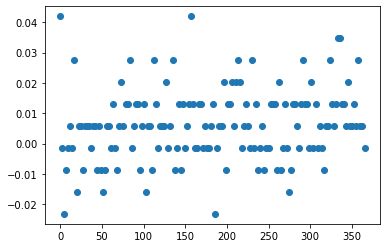

In [9]:
a = np.load("data/AIF.npy")
b = np.load("data/Example_Conc.npy")

t = np.arange(0,366,2.45)

plt.scatter(t, b[100,100,14,:])


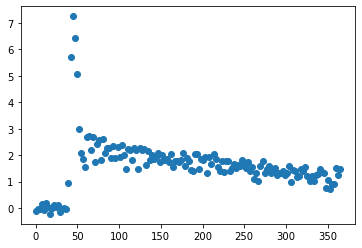

In [10]:
plt.scatter(t, a)

In [11]:
n_out = 10
model = nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512,n_out)
)

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 2)   # hidden layer
        self.hidden2 = torch.nn.Linear(2, 2)   # hidden layer
        self.predict = torch.nn.Linear(2, 1)

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))
        x = self.predict(x)             # linear output
        return x
    
net = Net()

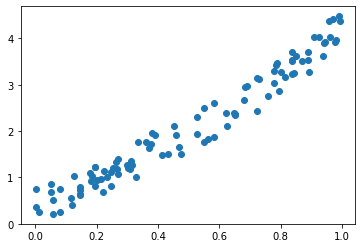

In [18]:
x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()



In [19]:
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()


In [20]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

(100, 1) (100, 1)


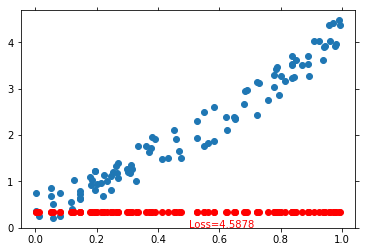

(100, 1) (100, 1)


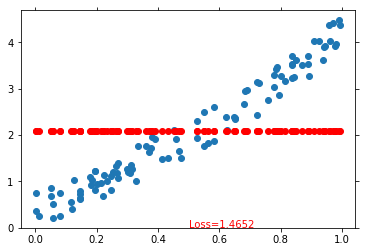

(100, 1) (100, 1)


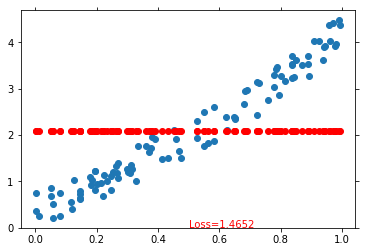

(100, 1) (100, 1)


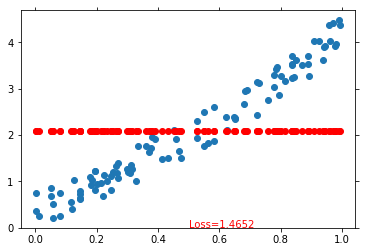

(100, 1) (100, 1)


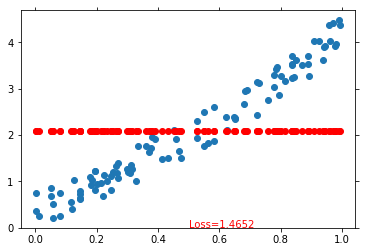

(100, 1) (100, 1)


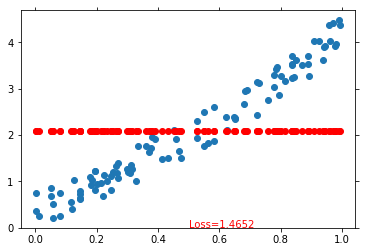

(100, 1) (100, 1)


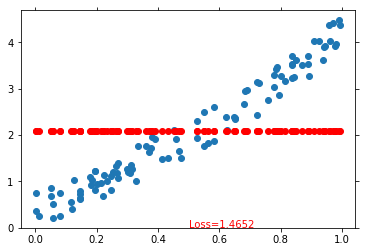

(100, 1) (100, 1)


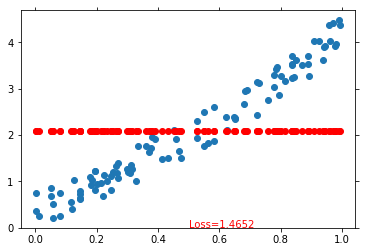

(100, 1) (100, 1)


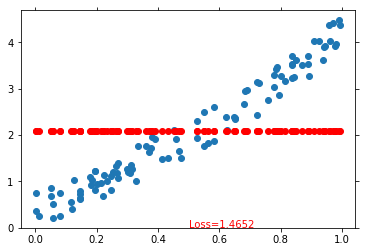

(100, 1) (100, 1)


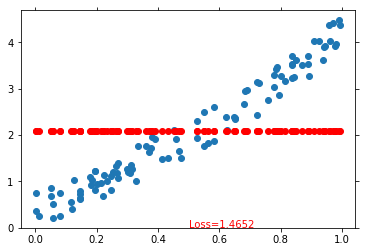

(100, 1) (100, 1)


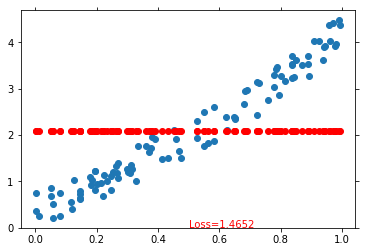

(100, 1) (100, 1)


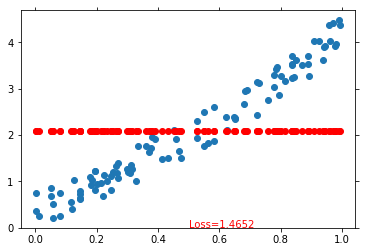

(100, 1) (100, 1)


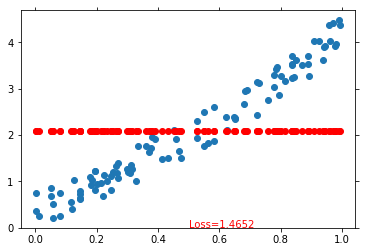

(100, 1) (100, 1)


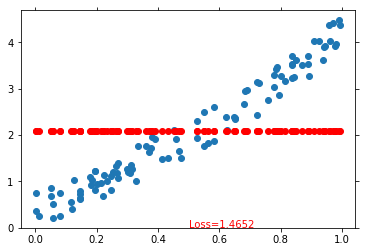

(100, 1) (100, 1)


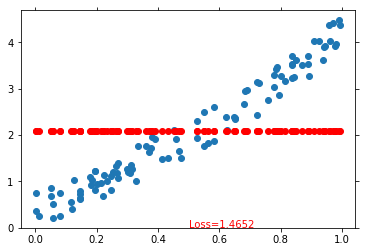

(100, 1) (100, 1)


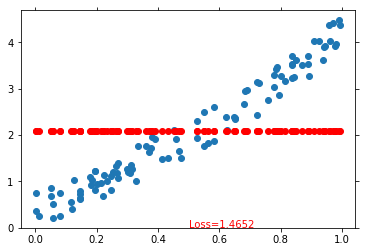

(100, 1) (100, 1)


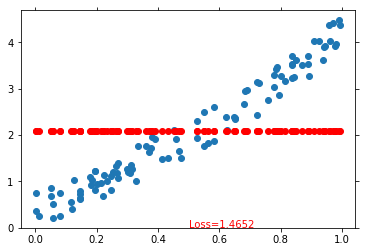

(100, 1) (100, 1)


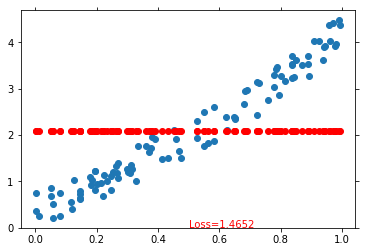

(100, 1) (100, 1)


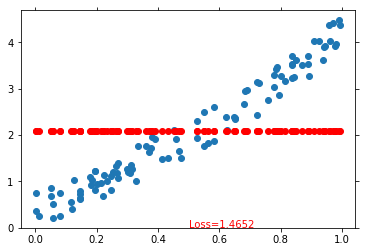

(100, 1) (100, 1)


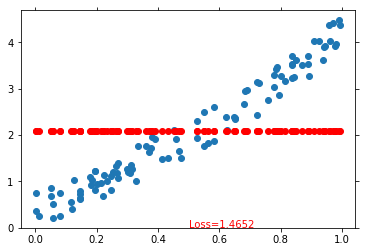

In [21]:
from torch.autograd import Variable
import torch.nn.functional as F


inputs = Variable(x)
outputs = Variable(y)
for i in range(500):
    prediction = net(inputs)
    loss = loss_func(prediction, outputs) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       

    if i % 25 == 0:
       # plot and show learning process
        print(prediction.data.numpy().shape, x.data.numpy().shape)
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), prediction.data.numpy(), c='red')
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()

In [22]:
'''
What is the the test data? Will it be the example_conc.npy data?
Because the example_conc.npy doesn't seem that similar to the train data which 
will be randomnly generated curves from E, vp, Fp. This doesn't matter though
because its simply trying to replicate the same results the model would get.

I don't think i can use neural nets to curve fit to get the PK parameters.
Its not curve fitting what we're doing, i was wrong my bad. Because we're
trying to find the PK parameters not the curve.

The input data for each voxel will be 150 points taken from the curve generated
by the PK parameters from the 
'''

"\nWhat is the the test data? Will it be the example_conc.npy data?\nBecause the example_conc.npy doesn't seem that similar to the train data which \nwill be randomnly generated curves from E, vp, Fp. This doesn't matter though\nbecause its simply trying to replicate the same results the model would get.\n\nI don't think i can use neural nets to curve fit to get the PK parameters.\nIts not curve fitting what we're doing, i was wrong my bad. Because we're\ntrying to find the PK parameters not the curve.\n\nThe input data for each voxel will be 150 points taken from the curve generated\nby the PK parameters from the \n"

In [23]:
b = np.random.rand(8)
a = np.random.rand(2)
def func(a):
    print(b)
    return a

func(a)

[0.82315319 0.59534839 0.06608627 0.41493907 0.48506205 0.92552379
 0.97422677 0.22172866]


array([0.6159759, 0.4642618])

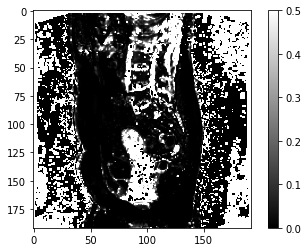

In [24]:
AIF = np.load("data/AIF.npy")
t = np.arange(0,366,2.45)

plt.imshow(series[:,:,14,100], clim = [0,0.5], cmap = 'gray')
plt.colorbar()



FileNotFoundError: [Errno 2] No such file or directory: '../../data/sideon.png'

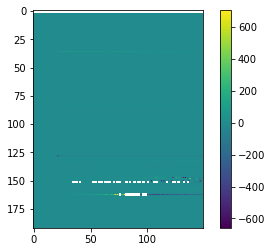

In [25]:
plt.imshow(series[:,100,14,:])
plt.colorbar()
plt.savefig("../../data/sideon.png")
plt.show()

plt.imshow(series[100,100,:,:])
plt.colorbar()
plt.savefig("../../data/depth.png")
plt.show()


plt.imshow(series[:,:,15,60])
plt.colorbar()
plt.savefig("../../data/front.png")
plt.show()


fitted_data = TwoCUMfittingConc(t, AIF, series[100,100,14,:] , 0)
fitted_curve = TwoCUM(fitted_data[0:3], t, AIF, 0)
plt.plot(t, fitted_curve)
plt.scatter(t ,series[100,100,14,:])
plt.savefig("../../data/air_plot.png")
plt.show()

fitted_data1 = TwoCUMfittingConc(t, AIF, series[127,100,14,:] , 0)
fitted_curve1 = TwoCUM(fitted_data1[0:3], t, AIF, 0)
plt.plot(t, fitted_curve1)
plt.scatter(t ,series[127,100,14,:])
plt.savefig("../../data/tissue.png")
plt.show()

fitted_data2 = TwoCUMfittingConc(t, AIF, series[38,100,14,:] , 0)
fitted_curve2 = TwoCUM(fitted_data2[0:3], t, AIF, 0)
plt.plot(t, fitted_curve2)
plt.scatter(t ,series[38,100,14,:])
plt.savefig("../../data/other_tissue.png")
plt.show()


In [ ]:
fitted_data1 = TwoCUMfittingConc(t, AIF, series[127,100,14,:] , 0)
print(fitted_data1)
fitted_curve1 = TwoCUM(fitted_data1[0:3], t, AIF, 0)
plt.scatter(t ,series[127,100,14,:])
plt.plot(t, 70*fitted_curve1, color = 'red')
plt.savefig("../../data/tissue_scaled.png")
plt.show()

fitted_data1 = TwoCUMfittingConc(t, AIF, series[127,100,14,:] , 0)
fitted_data1[0] = fitted_data1[0]/5
fitted_data1[2] = fitted_data1[2]


print(fitted_data1)
fitted_curve1 = TwoCUM(fitted_data1[0:3], t, AIF, 0)
plt.scatter(t ,series[127,100,14,:])
plt.plot(t, 100*fitted_curve1, color = 'red')
plt.show()

In [ ]:
series = np.load("data/Example_Conc.npy")
AIF = np.load("data/AIF.npy")
t = np.arange(0,366,2.45)

/Users/michaelmclaren/ProgProjects/MRI_Proper/tkmodel/TwoCUM.py:34: RuntimeWarning: overflow encountered in exp
  exptTp=np.exp(-1*t/Tp)
/Users/michaelmclaren/ProgProjects/MRI_Proper/tkmodel/TwoCUM.py:136: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(temp**2))


[0.         0.00056189 0.02      ] [1.e+00 1.e-05 1.e-02]


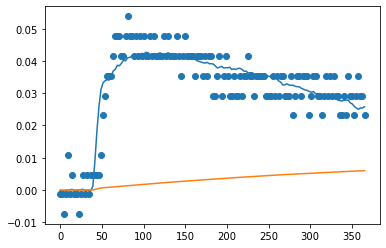

In [7]:
from tkmodel.TwoCUM_copy import TwoCUMfittingConc
from tkmodel.TwoCUM import TwoCUMfittingConc
from importlib import reload
reload(tkmodel.TwoCUM_copy)

# fitted_data = tkmodel.TwoCUM_copy.TwoCUMfittingConc(t, AIF, series[100,100,14,:] , 0)
#fitted_data1 = tkmodel.TwoCUM_copy.TwoCUMfittingConc(t, AIF, series[127,100,14,:] , 0)
fitted_data2 = tkmodel.TwoCUM_copy.TwoCUMfittingConc(t, AIF, series[38,100,14,:] , 0)
fitted_data3 = tkmodel.TwoCUM.TwoCUMfittingConc(t, AIF, series[38,100,14,:] , 0)
print(fitted_data2[0:3], fitted_data3[0:3])

fitted_curve = TwoCUM(fitted_data2[0:3], t, AIF, 0)
fitted_curve2 = TwoCUM(fitted_data3[0:3], t, AIF, 0)


plt.scatter(t, series[38,100,14,:])
plt.plot(t,fitted_curve)
plt.plot(t,fitted_curve2)

plt.show()


In [24]:
print(series[49, 190, 17,:])


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]


In [26]:


E_list = []
Fp_list = []
vp_list = []
for i in range(1000):
    i = np.random.randint(low = 0, high=192)
    j = np.random.randint(low = 0, high=192)
    k = np.random.randint(low = 0, high=30)

    if np.isnan(series[i,j,k,:]).any() == True or series[i,j,k,:].sum() > 50:
        print('OUT: ', i,j,k)
        print(series[i,j,k,:].sum())
        continue
    else:
        print('IN: ', i,j,k)
        print(series[i,j,k,:].sum())
        fitted_param = tkmodel.TwoCUM_copy.TwoCUMfittingConc(t, AIF, series[i,j,k,:] , 0)
        E_list.append(fitted_param[0])
        Fp_list.append(fitted_param[1])
        vp_list.append(fitted_param[2])




IN:  154 34 21
-7439.299499684788
OUT:  24 175 12
nan
IN:  102 127 8
1.6742131192232232
IN:  94 12 0
-20529.85727574479
OUT:  148 110 27
166.59313690344794
IN:  29 181 15
-52977.84176177922
OUT:  36 68 9
76.23302336597357
IN:  79 136 19
0.19361520289292364
IN:  73 8 2
-16162.354697635335
IN:  64 181 10
-16321.462077744021
OUT:  139 98 12
133.339762256075
OUT:  118 180 2
nan
IN:  143 169 28
-13232.20541388042
IN:  35 75 29
-4.673167131883041
IN:  23 138 10
-2.2850459618459107
IN:  71 187 12
-10358.342224505657
IN:  8 74 20
-1.6875295195618976
IN:  158 122 28
14.772398407116686
IN:  39 16 12
-18031.475800196484
IN:  168 63 2
0.03864099050553794
IN:  155 82 16
9.232728912321395
IN:  128 83 12
3.237430899226904
IN:  19 8 21
-5748.229844742431
IN:  82 96 21
0.31953598896855034
IN:  99 72 15
-0.06232811082468788
IN:  94 43 0
0.01705898671705687
IN:  103 55 10
0.03948674407457292
OUT:  129 186 21
nan
IN:  105 72 28
0.07439264694793993
IN:  109 186 10
-17191.144706433726
IN:  92 168 1
-41389.2

OUT:  33 140 20
316.28407049239223
IN:  132 44 22
8.541478502929811
IN:  127 67 22
-0.05033433514776303
OUT:  190 95 9
88.26380851686146
IN:  93 147 18
2.2172609420239473
IN:  144 17 0
-5147.6386834523055
IN:  79 75 27
-2.901375445254817
IN:  119 63 22
2.079742130309869
IN:  177 57 11
0.09090512911680879
IN:  4 34 14
-0.6618430185379757
IN:  64 176 17
-12603.584393829637
IN:  87 6 19
-46943.96555612607
IN:  24 57 5
2.1361085041107564
OUT:  3 7 20
nan
OUT:  100 32 13
541.6256205450653
IN:  102 84 11
0.23992985032233313
IN:  105 171 22
-93903.94653011794
IN:  115 105 21
0.8638336721533484
IN:  131 72 4
0.11726988586448944
IN:  164 130 20
-0.16108244840027158
IN:  68 20 12
-5902.53693422063
IN:  66 116 24
0.8970865636598432
IN:  123 28 29
-2887.226540016224
IN:  144 141 24
-0.42039989606354466
OUT:  0 111 1
nan
IN:  158 38 16
-4040.3844803592697
IN:  22 54 19
0.16927805825089343
IN:  153 20 18
-10186.864138906185
IN:  16 143 3
-34340.99846415283
IN:  70 75 5
1.0141053054124212
IN:  185 14

OUT:  122 24 28
nan
IN:  149 26 19
-15732.794333424416
IN:  59 150 1
-4506.157779728619
IN:  19 89 26
32.94383030309325
OUT:  149 20 25
nan
IN:  102 102 17
3.5814234448390376
IN:  14 117 22
-19437.039188232462
IN:  80 171 24
-8166.320887464581
IN:  88 28 11
3.9539296874611196
IN:  5 105 21
9.56221897188859
IN:  81 42 7
-0.020237881410950002
IN:  36 130 7
1.2284487867110534
IN:  138 73 7
0.9965332136990621
IN:  2 42 7
-15.597171246650486
IN:  109 45 15
-0.06389164790418618
IN:  119 158 0
-38985.0355197014
OUT:  142 147 23
56.84278520699162
IN:  126 144 18
1.2914750679019689
IN:  85 45 11
-0.017858956680960304
OUT:  93 179 29
nan
IN:  37 11 22
-13677.081080939573
IN:  140 83 23
-0.31767000610018337
IN:  6 66 3
1.2237698619905388
IN:  61 150 3
-3307.2654779177
IN:  6 99 27
23.559359332955708
IN:  5 59 0
-1.7563368742265582
IN:  45 106 9
6.86341480267626
IN:  172 39 23
39.6249903476515
IN:  149 57 15
-0.10857741246970903
OUT:  88 30 27
nan
IN:  21 68 20
8.812862271366743
OUT:  48 31 19
904

IN:  145 152 26
-7573.357198257123
IN:  101 114 19
0.7119659512607814
IN:  21 3 16
-9001.974589183255
OUT:  129 102 15
333.0245097217765
IN:  46 57 6
0.21117259522884788
OUT:  28 12 1
nan
IN:  163 126 14
-0.9716248500613394
IN:  68 35 29
2.7528656229351185
IN:  85 93 23
5.408969342828567
OUT:  57 107 19
nan
IN:  79 56 0
-0.10491490003780055
IN:  136 77 13
0.18474835786979193
IN:  167 135 4
-0.00937713046786648
IN:  14 1 22
-36524.324817081586
OUT:  5 173 1
nan
OUT:  16 157 28
nan
IN:  15 34 24
0.04251768757313409
OUT:  57 9 3
nan
IN:  181 132 13
-0.049408534321409556
IN:  166 131 7
-0.08744757692749676
IN:  174 18 24
-41794.94621745948
OUT:  57 0 6
nan
OUT:  144 130 22
52.08417756926681
OUT:  182 44 15
327.85802294605026
IN:  191 111 9
-68.15010357892535
IN:  121 175 3
-13233.116509798494
IN:  2 92 1
21.861578462242754
IN:  170 15 23
-75263.81493400599
IN:  49 179 17
-53112.885306705204
IN:  183 147 10
5.474526864932251
OUT:  80 153 15
17361.33230217574
IN:  16 83 8
-1.0073454356936917

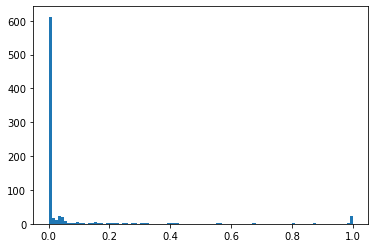

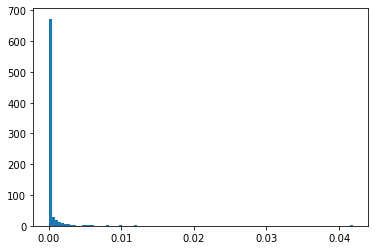

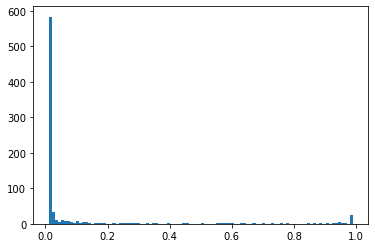

<Figure size 432x288 with 0 Axes>

In [31]:
plt.hist(E_list, bins = 100)
plt.show()
plt.clf()

plt.hist(Fp_list, bins = 100)
plt.show()
plt.clf()

plt.hist(vp_list, bins = 100)
plt.show()
plt.clf()

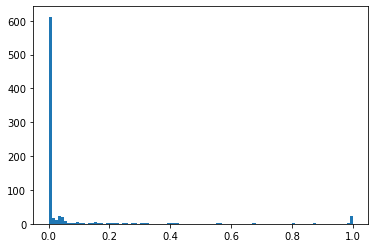

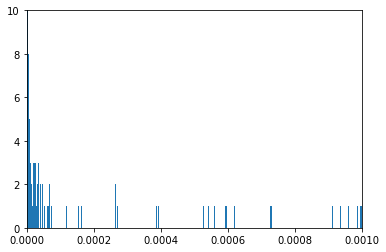

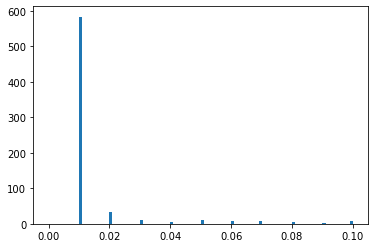

<Figure size 432x288 with 0 Axes>

In [49]:
plt.hist(E_list, bins = 100, range = [0, 1])
plt.show()
plt.clf()


plt.hist(Fp_list, bins = 1000, range = [0, 0.001])
plt.axis([0, 0.001, 0, 10])
plt.show()
plt.clf()

plt.hist(vp_list, bins = 100, range = [0, 0.1])
plt.show()
plt.clf()